In [1]:
import os
import cv2
import numpy as np

root_data = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/BM_GRAZ/source/'
root_label = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/BM_GRAZ/annotations/'
imageList = os.listdir(root_data)

mean = np.zeros((3),dtype=np.float32)
for i in imageList[0:-1]:
    img = cv2.imread(root_data + i)
    mean = (mean + img.mean(axis=0).mean(axis=0)/len(imageList[0:-1]))

print (mean)

print(imageList)

[ 193.67899132  158.25960826  198.46009229]
['BM_GRAZ_HE_0002_01.png', 'BM_GRAZ_HE_0020_01.png', 'BM_GRAZ_HE_0003_01.png', 'BM_GRAZ_HE_0006_01.png', 'BM_GRAZ_HE_0001_02.png', 'BM_GRAZ_HE_0001_01.png', 'BM_GRAZ_HE_0003_02.png', 'BM_GRAZ_HE_0004_01.png', 'BM_GRAZ_HE_0002_02.png', 'BM_GRAZ_HE_0007_01.png', 'BM_GRAZ_HE_0008_01.png']


load model successfully!
total spend: 1.25080299377s


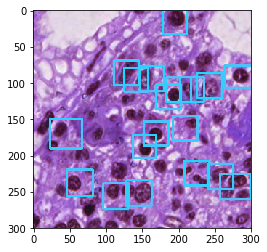

In [2]:
import cv2
import numpy as np
from faster_rcnn import network
from faster_rcnn.faster_rcnn import FasterRCNN
from faster_rcnn.utils.timer import Timer


def test():
    import os
    im_file = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/BM_GRAZ/source/BM_GRAZ_HE_0020_01.png'
    #im_file = 'data/VOCdevkit2007/VOC2007/JPEGImages/009036.jpg'
    # im_file = '/media/longc/Data/data/2DMOT2015/test/ETH-Crossing/img1/000100.jpg'
    image = cv2.imread(im_file)
    #image = cv2.resize(image,(4800,4800))
    img = image-mean
    #print (img)
    model_file = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/faster_rcnn_50000_thebestdontdeleteit.h5'
    # model_file = '/media/longc/Data/models/faster_rcnn_pytorch3/faster_rcnn_100000.h5'
    # model_file = '/media/longc/Data/models/faster_rcnn_pytorch2/faster_rcnn_2000.h5'
    detector = FasterRCNN(classes=np.asarray(['__background__','cell']))
    network.load_net(model_file, detector)
    detector.cuda()
    detector.eval()
    print('load model successfully!')

    # network.save_net(r'/media/longc/Data/models/VGGnet_fast_rcnn_iter_70000.h5', detector)
    # print('save model succ')

    t = Timer()
    t.tic()
    # image = np.zeros(shape=[600, 800, 3], dtype=np.uint8) + 255
    dets, scores, classes = detector.detect(image[0:300,0:300,::-1], 0.1)
    runtime = t.toc()
    print('total spend: {}s'.format(runtime))

    im2show = np.copy(image[0:300,0:300,::-1])
    for i, det in enumerate(dets):
        det = tuple(int(x) for x in det)
        cv2.rectangle(im2show, det[0:2], det[2:4], (255, 205, 51), 2)
        #cv2.putText(im2show, '%s: %.3f' % (classes[i], scores[i]), (det[0], det[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                    #1.0, (0, 0, 255), thickness=1)
    cv2.imwrite(os.path.join('demo', 'out.jpg'), im2show)
    import matplotlib.pyplot as plt
    from PIL import Image
    plt.imshow(Image.open(os.path.join('demo', 'out.jpg')))
    plt.show()
    #cv2.imshow('demo', im2show)
    #cv2.waitKey(0)


if __name__ == '__main__':
    test()

In [ ]:
import cv2
import numpy as np
from faster_rcnn import network
from faster_rcnn.faster_rcnn import FasterRCNN
from faster_rcnn.utils.timer import Timer
from faster_rcnn import nms_detections

import os
im_file = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/BM_GRAZ/source/BM_GRAZ_HE_0008_01.png'
    #im_file = 'data/VOCdevkit2007/VOC2007/JPEGImages/009036.jpg'
    # im_file = '/media/longc/Data/data/2DMOT2015/test/ETH-Crossing/img1/000100.jpg'
image = cv2.imread(im_file)
    #image = cv2.resize(image,(4800,4800))
img = image-mean
    #print (img)
model_file = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/faster_rcnn_50000_thebestdontdeleteit.h5'
    # model_file = '/media/longc/Data/models/faster_rcnn_pytorch3/faster_rcnn_100000.h5'
    # model_file = '/media/longc/Data/models/faster_rcnn_pytorch2/faster_rcnn_2000.h5'
detector = FasterRCNN(classes=np.asarray(['__background__','cell']))
network.load_net(model_file, detector)
detector.cuda()
detector.eval()
print('load model successfully!')

    # network.save_net(r'/media/longc/Data/models/VGGnet_fast_rcnn_iter_70000.h5', detector)
    # print('save model succ')
    
t = Timer()
t.tic()
    
lst = []
    
for m in range(0,19):
    for n in range(0,19):
    # image = np.zeros(shape=[600, 800, 3], dtype=np.uint8) + 255
        dets, scores, classes = detector.detect(image[m*50:300+m*50,n*50:300+n*50,::-1], 0.1)
        if dets.shape[0] == 0:
            continue
        runtime = t.toc()
        print('total spend: {}s'.format(runtime))
        lst.append(np.concatenate([(dets[:,0]+n*50).reshape(-1,1),(dets[:,1]+m*50).reshape(-1,1),(dets[:,2]+n*50).reshape(-1,1),(dets[:,3]+m*50).reshape(-1,1)],axis=1))

im2show = np.copy(image[:,:,:])
for i, element in enumerate(lst):
    for i, det in enumerate(element):
        det = tuple(int(x) for x in det)
        cv2.rectangle(im2show, det[0:2], det[2:4], (255, 205, 51), 2)
    #cv2.putText(im2show, '%s: %.3f' % (classes[i], scores[i]), (det[0], det[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                    #1.0, (0, 0, 255), thickness=1)
cv2.imwrite(os.path.join('demo', 'out.jpg'), im2show)
import matplotlib.pyplot as plt
from PIL import Image
plt.imshow(Image.open(os.path.join('demo', 'out.jpg')))
plt.show()
    #cv2.imshow('demo', im2show)
    #cv2.waitKey(0)


In [ ]:
(dets[:,0]+m*300).reshape(-1,1)

In [ ]:
im2show = np.copy(image[:,:,:])
for i, element in enumerate(lst):
    for i, det in enumerate(element):
        det = tuple(int(x) for x in det)
        cv2.rectangle(im2show, det[0:2], det[2:4], (255, 205, 51), 2)
    #cv2.putText(im2show, '%s: %.3f' % (classes[i], scores[i]), (det[0], det[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                    #1.0, (0, 0, 255), thickness=1)
cv2.imwrite(os.path.join('demo', 'out.jpg'), im2show)
import matplotlib.pyplot as plt
from PIL import Image
plt.imshow(Image.open(os.path.join('demo', 'out.jpg')))
plt.show()


In [ ]:
lst

In [ ]:
dets[:,2:4]+n*50

In [ ]:
iterator = []

for i in imageList[0:-1]:
    print (len(iterator))
    img = cv2.imread(root_data + i)    
    label = cv2.imread(root_label + i, 2)
    img = cv2.resize(img,(4800,4800))
    #label = cv2.resize(label,(4800,4800))
    for hight in range(0,6):
        for width in range(0,6):
            data_dict = {}
            lst = []
            for x in range(hight*200,hight*200+200):
                for y in range(width*200,width*200+200):
                    if label[x,y] == 255:
                        lst.append([(x-hight*200)*4,(y-width*200)*4])

            if len(lst) == 0:
                continue
            data_dict['im_data'] = (img-mean)[hight*800:hight*800+800,width*800:width*800+800,::-1].reshape(1,800,800,3).astype(np.float32)
            
            #store = np.asarray(lst,dtype=int).reshape(-1,2)
            q = 0
            bbox = np.zeros((len(lst),5),dtype=np.float32)
            for i in lst:
                q+=1
                x1,y1 = max(0,i[0]-64),max(0,i[1]-64)
                x2,y2 = x1+128,y1+128
                if x1+128>800:
                    x1, x2 = (800-128), 800
                if y1+128>800:
                    y1, y2 = (800-128), 800
                #biglst.append(image_output)
                bbox[q-1] =  [y1,x1,y2,x2,1] 
            assert q == len(lst)
            data_dict['gt_boxes'] = bbox.astype(np.float32)
            iterator.append(data_dict)
            
            im2show = np.copy(img[hight*800:hight*800+800,width*800:width*800+800,:])
            for i, det in enumerate(bbox.astype(np.float32)):
                det = tuple(int(x) for x in det)
                cv2.rectangle(im2show, det[0:2], det[2:4], (255, 205, 51), 2)
            cv2.imwrite('/home/hbkunn/rpn/faster_rcnn_pytorch/store_for_effect/_'+str(len(iterator))+'.jpg', im2show)
            print ('saved')


In [ ]:
import os
import cv2
import numpy as np

root_data = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/BM_GRAZ/source/'
root_label = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/BM_GRAZ/annotations/'
imageList = os.listdir(root_data)

mean = np.zeros((3),dtype=np.float32)
for i in imageList[0:-1]:
    img = cv2.imread(root_data + i)
    mean = (mean + img.mean(axis=0).mean(axis=0)/len(imageList[0:-1]))
    
print (mean)

import numpy as np

root_data = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/BM_GRAZ/source/'
root_label = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/BM_GRAZ/annotations/'
imageList = os.listdir(root_data)

iterator = []
biglst = []
for i in imageList[0:-1]:
    data_dict = {}
    img = cv2.imread(root_data + i)    
    label = cv2.imread(root_label + i, 2)
    lst = []
    data_dict['im_data'] = (img-mean).reshape(1,1200,1200,3)
    for x in range(0, label.shape[0]):
        for y in range(0, label.shape[1]):
            if label[x,y] == 255:
                lst.extend([x,y])
    
    store = np.asarray(lst,dtype=int).reshape(-1,2)
    q = 0
    bbox = np.zeros((store.shape[0],5),dtype=np.float32)
    for i in store:
        q+=1
        x1,y1 = max(0,i[0]-16),max(0,i[1]-16)
        x2,y2 = x1+32,y1+32
        if x1+32>1200:
            x1, x2 = (1200-32), 1200
        if y1+32>1200:
            y1, y2 = (1200-32), 1200
        image_output = img[x1:x2,y1:y2,:]
        biglst.append(image_output)
        bbox[q-1] =  [x1,y1,x2,y2,1]
    assert q == store.shape[0]
    data_dict['gt_boxes'] = bbox.astype(np.float32)
    iterator.append(data_dict)

im_info = np.asarray([[1200.,1200.,1]],dtype=np.float32)
gt_ishard = None
dontcare_areas = np.zeros((0,4), dtype=np.float32)
element = iterator[0]
im_data = element.get('im_data')
#im_info = blobs['im_info']
gt_boxes = element.get('gt_boxes')

model_file = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/faster_rcnn_40000.h5'
detector = FasterRCNN(classes=np.asarray(['__background__','cell']))
network.load_net(model_file, detector)
detector.cuda()


In [ ]:
cls_prob, bbox_pred, rois = detector(im_data, im_info, gt_boxes, gt_ishard, dontcare_areas)

In [ ]:
detector.interpret_faster_rcnn(cls_prob, bbox_pred, rois, im_info, im_shape=np.asarray([1200,1200,3]), 
                      nms=True, clip=True, min_score=0.0)


In [ ]:
rois.data.cpu().numpy()

In [ ]:
rois.data.cpu().numpy().shape

In [ ]:
im2show = np.copy(cv2.imread(root_data + imageList[0]))
                  
for i, det in enumerate(rois.data.cpu().numpy()[:,1:5]):
    det = tuple(int(x) for x in det)
    cv2.rectangle(im2show, det[0:2], det[2:4], (255, 205, 51), 2)
    cv2.putText(im2show, '%s: %.3f' % ('cell', 99.9), (det[0], det[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                1.0, (0, 0, 255), thickness=1)                  
cv2.imwrite(os.path.join('demo', 'out.jpg'), im2show)


In [ ]:
import cv2
import numpy as np
from faster_rcnn import network
from faster_rcnn.faster_rcnn import FasterRCNN
from faster_rcnn.utils.timer import Timer


def test():
    import os
    #im_file = '/home/hbkunn/rpn/faster_rcnn_pytorch/data/BM_GRAZ/source/BM_GRAZ_HE_0008_01.png'
    im_file = 'demo/004545.jpg'
    # im_file = 'data/VOCdevkit2007/VOC2007/JPEGImages/009036.jpg'
    # im_file = '/media/longc/Data/data/2DMOT2015/test/ETH-Crossing/img1/000100.jpg'
    image = cv2.imread(im_file)

    model_file = 'faster_rcnn/VGGnet_fast_rcnn_iter_70000.h5'
    # model_file = '/media/longc/Data/models/faster_rcnn_pytorch3/faster_rcnn_100000.h5'
    # model_file = '/media/longc/Data/models/faster_rcnn_pytorch2/faster_rcnn_2000.h5'
    detector = FasterRCNN()
    network.load_net(model_file, detector)
    detector.cuda()
    detector.eval()
    print('load model successfully!')

    # network.save_net(r'/media/longc/Data/models/VGGnet_fast_rcnn_iter_70000.h5', detector)
    # print('save model succ')

    t = Timer()
    t.tic()
    # image = np.zeros(shape=[600, 800, 3], dtype=np.uint8) + 255
    dets, scores, classes = detector.detect(image, 0.7)
    print (dets, scores, classes)
    runtime = t.toc()
    print('total spend: {}s'.format(runtime))

    im2show = np.copy(image)
    for i, det in enumerate(dets):
        det = tuple(int(x) for x in det)
        cv2.rectangle(im2show, det[0:2], det[2:4], (255, 205, 51), 2)
        cv2.putText(im2show, '%s: %.3f' % (classes[i], scores[i]), (det[0], det[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                    1.0, (0, 0, 255), thickness=1)
    cv2.imwrite(os.path.join('demo', 'out.jpg'), im2show)
    #cv2.imshow('demo', im2show)
    #cv2.waitKey(0)


if __name__ == '__main__':
    test()

In [ ]:
import torch
import numpy as np
from torch.autograd import Variable

x = (np.random.normal(size = 10)>0).astype(int)
y = (np.random.normal(size = 10)>0).astype(int)
z = np.logical_xor(x>0,y>0)
z = z.astype(int)

X = Variable(torch.FloatTensor(x))
Y = Variable(torch.FloatTensor(y))
Z = Variable(torch.FloatTensor(z))

def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / np.sqrt(in_dim / 2.)
    return Variable(torch.randn(*size) * xavier_stddev, requires_grad=True)

weight1 = xavier_init([1])
b1 = Variable(torch.zeros(1), requires_grad=True)
weight2 = xavier_init([1])
b2 = Variable(torch.zeros(1), requires_grad=True)
weight3 = xavier_init([1])
b3 = Variable(torch.zeros(1), requires_grad=True)
weight4 = xavier_init([1])
b4 = Variable(torch.zeros(1), requires_grad=True)
weight5 = xavier_init([1])
weight6 = xavier_init([1])
weight7 = xavier_init([1])
weight8 = xavier_init([1])
b5 = Variable(torch.zeros(1), requires_grad=True)

import torch.nn.functional as nn

output1 = nn.sigmoid(nn.relu(X*weight1.repeat(10) + b1.repeat(10)))
output2 = nn.sigmoid(nn.relu(X*weight2.repeat(10) + b2.repeat(10)))
output3 = nn.sigmoid(nn.relu(X*weight3.repeat(10) + b3.repeat(10)))
output4 = nn.sigmoid(nn.relu(X*weight4.repeat(10) + b4.repeat(10)))
output5 = nn.relu(output1*weight5.repeat(10)+output2*weight6.repeat(10)+output3*weight7.repeat(10)+output4*weight8.repeat(10)+b5.repeat(10))
output = nn.sigmoid(output5)

loss = torch.mean((output-Z)**2)
loss.backward()

params = [weight1,weight2,weight3,weight4,weight5,weight6,weight7,weight8,b1,b2,b3,b4,b5]

import torch.optim as optim
solver = optim.SGD(params, lr=1e-3)

for i in range(0,10000):
    x = (np.random.normal(size = 10)>0).astype(int)
    y = (np.random.normal(size = 10)>0).astype(int)
    z = np.logical_xor(x>0,y>0)
    z = z.astype(int)

    X = Variable(torch.FloatTensor(x))
    Y = Variable(torch.FloatTensor(y))
    Z = Variable(torch.FloatTensor(z))
    
    output1 = nn.sigmoid(X*weight1.repeat(10) + b1.repeat(10))
    output2 = nn.sigmoid(X*weight2.repeat(10) + b2.repeat(10))
    output3 = nn.sigmoid(X*weight3.repeat(10) + b3.repeat(10))
    output4 = nn.sigmoid(X*weight4.repeat(10) + b4.repeat(10))
    output5 = (output1*weight5.repeat(10)+output2*weight6.repeat(10)+output3*weight7.repeat(10)+output4*weight8.repeat(10)+b5.repeat(10))
    output = nn.sigmoid(output5)

    loss = torch.mean((output-Z)**2)
    loss.backward()
    
    solver.step()
    if i%100 == 0:
        print (loss)
        print ((output.data.numpy()>0.5).astype(int)==z).astype(int).sum()

In [ ]:
z

In [ ]:
output.data.numpy()

In [ ]:
(output-Z)**2

In [ ]:
output1*weight5.repeat(1000)

In [ ]:
loss = nll_loss(output5,Z)

In [ ]:
torch.cat([output1,output2,output3,output4])

In [ ]:
output1 = nn.sigmoid(nn.relu(X*weight1 + b1.repeat(1000)))
output2 = nn.sigmoid(nn.relu(X*weight2 + b2.repeat(1000)))
output3 = nn.sigmoid(nn.relu(X*weight3 + b3.repeat(1000)))
output4 = nn.sigmoid(nn.relu(X*weight4 + b4.repeat(1000)))

In [ ]:
weight1

In [ ]:
import cv2
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from faster_rcnn.network import Conv2d
import faster_rcnn.network as network

class VGG16(nn.Module):
    def __init__(self, bn=False):
        super(VGG16, self).__init__()
        bn = False
        self.conv1 = nn.Sequential(Conv2d(3, 64, 3, same_padding=True, bn=bn),
                                   Conv2d(64, 64, 3, same_padding=True, bn=bn),
                                   nn.MaxPool2d(2))
        self.conv2 = nn.Sequential(Conv2d(64, 128, 3, same_padding=True, bn=bn),
                                   Conv2d(128, 128, 3, same_padding=True, bn=bn),
                                   nn.MaxPool2d(2))
        network.set_trainable(self.conv1, requires_grad=False)
        network.set_trainable(self.conv2, requires_grad=False)

        self.conv3 = nn.Sequential(Conv2d(128, 256, 3, same_padding=True, bn=bn),
                                   Conv2d(256, 256, 3, same_padding=True, bn=bn),
                                   Conv2d(256, 256, 3, same_padding=True, bn=bn),
                                   nn.MaxPool2d(2))
        self.conv4 = nn.Sequential(Conv2d(256, 512, 3, same_padding=True, bn=bn),
                                   Conv2d(512, 512, 3, same_padding=True, bn=bn),
                                   Conv2d(512, 512, 3, same_padding=True, bn=bn),
                                   nn.MaxPool2d(2))
        self.conv5 = nn.Sequential(Conv2d(512, 512, 3, same_padding=True, bn=bn),
                                   Conv2d(512, 512, 3, same_padding=True, bn=bn),
                                   Conv2d(512, 512, 3, same_padding=True, bn=bn))

    def forward(self, im_data):
        # im_data, im_scales = get_blobs(image)
        # im_info = np.array(
        #     [[im_data.shape[1], im_data.shape[2], im_scales[0]]],
        #     dtype=np.float32)
        # data = Variable(torch.from_numpy(im_data)).cuda()
        # x = data.permute(0, 3, 1, 2)

        x = self.conv1(im_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        return x

    def load_from_npz(self, params):
        # params = np.load(npz_file)
        own_dict = self.state_dict()
        for name, val in own_dict.items():
            i, j = int(name[4]), int(name[6]) + 1
            ptype = 'weights' if name[-1] == 't' else 'biases'
            key = 'conv{}_{}/{}:0'.format(i, j, ptype)
            param = torch.from_numpy(params[key])
            if ptype == 'weights':
                param = param.permute(3, 2, 0, 1)
            val.copy_(param)

    # def load_from_npy_file(self, fname):
    #     own_dict = self.state_dict()
    #     params = np.load(fname).item()
    #     for name, val in own_dict.items():
    #         # # print name
    #         # # print val.size()
    #         # # print param.size()
    #         # if name.find('bn.') >= 0:
    #         #     continue
    #
    #         i, j = int(name[4]), int(name[6]) + 1
    #         ptype = 'weights' if name[-1] == 't' else 'biases'
    #         key = 'conv{}_{}'.format(i, j)
    #         param = torch.from_numpy(params[key][ptype])
    #
    #         if ptype == 'weights':
    #             param = param.permute(3, 2, 0, 1)
    #
    #         val.copy_(param)


vgg = VGG16()

In [ ]:
vgg(Variable(torch.ones(1,3,224,224)))

In [ ]:
__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
}


def conv3x3(in_planes, out_planes, stride=1):
    "3x3 convolution with padding"
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000):
        self.inplanes = 64
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        #self.avgpool = nn.AvgPool2d(7)
        #self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        #x = self.avgpool(x)
        #x = x.view(x.size(0), -1)
        #x = self.fc(x)

        return x


def resnet18(pretrained=False, **kwargs):
    """Constructs a ResNet-18 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))
    return model


def resnet34(pretrained=False, **kwargs):
    """Constructs a ResNet-34 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [3, 4, 6, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet34']))
    return model


def resnet50(pretrained=False, **kwargs):
    """Constructs a ResNet-50 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet50']))
    return model


def resnet101(pretrained=False, **kwargs):
    """Constructs a ResNet-101 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 4, 23, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet101']))
    return model


def resnet152(pretrained=False, **kwargs):
    """Constructs a ResNet-152 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 8, 36, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet152']))
    return model

import torch.nn as nn
import math
import torch.utils.model_zoo as model_zoo

resnet18 = resnet18(pretrained=False)
resnet34 = resnet34(pretrained=False)
resnet50 = resnet50(pretrained=False)
resnet101 = resnet101(pretrained=False)
resnet152 = resnet152(pretrained=False)

In [ ]:
model_dict = resnet18.state_dict()
pretrained_dict = model_zoo.load_url(model_urls['resnet18'])
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
model_dict.update(pretrained_dict) 
resnet18.load_state_dict(model_dict)

model_dict = resnet34.state_dict()
pretrained_dict = model_zoo.load_url(model_urls['resnet34'])
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
model_dict.update(pretrained_dict) 
resnet34.load_state_dict(model_dict)

model_dict = resnet50.state_dict()
pretrained_dict = model_zoo.load_url(model_urls['resnet50'])
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
model_dict.update(pretrained_dict) 
resnet50.load_state_dict(model_dict)

In [ ]:
resnet50(Variable(torch.zeros(1,3,600,800)))

In [ ]:
import numpy as np
import h5py
h5f = h5py.File('/home/hbkunn/rpn/faster_rcnn_pytorch/data/faster_rcnn_192000.h5', mode='r')
for k, v in net.state_dict().items():
    param = torch.from_numpy(np.asarray(h5f[k]))
    v.copy_(param)

